In [54]:
import tensorflow as tf
import numpy as np
import pandas
import os
import matplotlib.pyplot as plt

%matplotlib inline

def featureNormalise(X):
    mu = np.mean(X,0)
    sigma = np.std(X,0, ddof=1)
    return ((X - mu) / sigma), mu, sigma

def mapFeatures(x1, x2):
    degree = 6;
    out = np.ones([x1.shape[0],1]);
    for i in range(1, degree+1):
        for j in range(0, i+1):
            out = np.hstack((out,np.array((x1**(i-j)) * (x2**j)).reshape(x1.shape[0],1)))
    return out


## Load Training data
dataset = pandas.read_csv("data/ex4data1_X.csv", header=None)
labels = pandas.read_csv("data/ex4data1_y.csv", header=None)

m,n = dataset.shape
X = dataset.values.reshape(m,n).astype(np.float32)
y_raw = labels.values.ravel() - 1

y = np.zeros([m, 10]).astype(np.float32)
for i in range(0,m):
    y[i,y_raw[i]] = 1.

## Load Validation and Test data

## Normalise
x_norm = X#, mu, sigma = featureNormalise(X)

# Add bias
x_with_bias = np.hstack((np.ones((x_norm.shape[0],1)),x_norm)).astype(np.float32)
#x_with_bias = mapFeatures(x_norm[:,0], x_norm[:,1]).astype(np.float32)
#m,n = x_with_bias.shape

In [55]:

# We'll bundle groups of examples during training for efficiency.
# This defines the size of the batch.
BATCH_SIZE = m
HIDDEN_UNITS = 25
NUM_FEATURES = n 
NUM_LABELS = 10
# The random seed that defines initialization.
SEED = 42

# This is where training samples and labels are fed to the graph.
# These placeholder nodes will be fed a batch of training data at each
# training step, which we'll write once we define the graph structure.
train_data_node = tf.placeholder(tf.float32, shape=(BATCH_SIZE, NUM_FEATURES+1))
train_labels_node = tf.placeholder(tf.float32, shape=(BATCH_SIZE, NUM_LABELS))

# The variables below hold all the trainable weights. For each, the
# parameter defines how the variables will be initialized. 
# TODO : These should be pulled from a config file

Theta1 = tf.Variable( tf.truncated_normal([HIDDEN_UNITS, (NUM_FEATURES+1)], stddev=0.1, seed=SEED))

Theta2 = tf.Variable( tf.truncated_normal([NUM_LABELS, HIDDEN_UNITS],stddev=0.1, seed=SEED))
bias2 = tf.Variable(tf.constant(0.1, shape=[NUM_LABELS]))
    
print('Done')

Done


In [56]:
def model(X, Theta1, Theta2, bias):
    """The Model definition."""
    # Perceptron
    
    layer1 = tf.nn.sigmoid(tf.matmul(X, tf.transpose(Theta1)))
                        
    output = tf.nn.bias_add(tf.matmul(layer1, tf.transpose(Theta2)),bias)

    return output
    
print('Done')

Done


In [57]:
yhat = model(train_data_node, Theta1, Theta2, bias2)

# Change the weights by subtracting derivative with respect to that weight
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=yhat))

# Optimizer: 

# Gradient Descent
# NOTE: With GD, the learning rate has to be cranked massively to get decent performance!
update_weights = tf.train.GradientDescentOptimizer(20).minimize(loss)

# Predictions
train_prediction = yhat

print('Done')

Done


In [58]:
# Create a new interactive session that we'll use in
# subsequent code cells.
s = tf.InteractiveSession()

# Use our newly created session as the default for 
# subsequent operations.
s.as_default()

# Initialize all the variables we defined above.
tf.global_variables_initializer().run()

In [59]:
#################
##### Train #####
#################

# Keep track of the loss at each iteration so we can chart it later
losses = []

# How many iterations to run our training
training_steps = 3000

# Feed the entire batch
# Grab the first BATCH_SIZE examples and labels.
batch_data = x_with_bias[:BATCH_SIZE,:]
batch_labels = y[:BATCH_SIZE,:]

# This dictionary maps the batch data (as a numpy array) to the
# node in the graph it should be fed to.
feed_dict = {train_data_node: batch_data,
             train_labels_node: batch_labels}

for _ in range(training_steps):
    
    
    # Run the graph and fetch some of the nodes.
    betas, l, predictions = s.run(
        [update_weights, loss, train_prediction],
        feed_dict=feed_dict)
    
    # Print out the loss periodically.
    losses.append(l)


print('Done')

Done


In [60]:
predictions = s.run(train_prediction, feed_dict=feed_dict)


In [61]:
a = np.argmax(predictions,axis=1) 
np.sum(a == y_raw) / np.float32(5000)

0.996

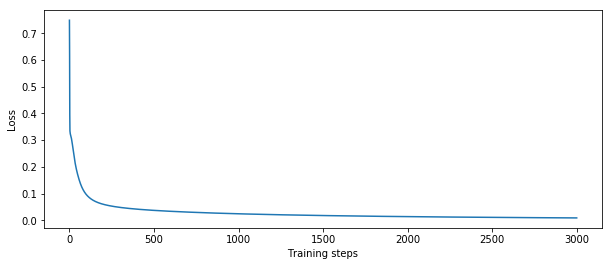

In [62]:
# Show the fit and the loss over time.
fig, (ax1) = plt.subplots(1, 1)
plt.subplots_adjust(wspace=.3)
fig.set_size_inches(10, 4)

ax1.plot(range(0, len(losses)), np.array(losses).ravel())
ax1.set_ylabel("Loss")
ax1.set_xlabel("Training steps")
plt.show()